# Testing notebook

In [1]:
import os 

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

from PathLoader import PathLoader

path_loader = PathLoader('data_config.env', 'current_user.env')


Project path set to: c:\Github\ode-biomarker-project


## Loading Data

In [2]:
from PathLoader import PathLoader

path_loader = PathLoader('data_config.env', 'current_user.env')

### Load data

import pandas as pd
import pickle

# import GDSC2 drug response data using pickle

with open(f'{path_loader.get_data_path()}data/drug-response/GDSC2/cache_gdsc2.pkl', 'rb') as f:
    gdsc2 = pickle.load(f)
    gdsc2_info = pickle.load(f)
    
# import CCLE gene expression data using pickle

with open(f'{path_loader.get_data_path()}data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl', 'rb') as f:
    gene_entrez = pickle.load(f)
    ccle = pickle.load(f)

# import CCLE sample info data using pickle

with open(f'{path_loader.get_data_path()}data/gene-expression/CCLE_Public_22Q2/ccle_sample_info.pkl', 'rb') as f:
    ccle_sample_info = pickle.load(f)

# import STRING database using pickle

with open(f'{path_loader.get_data_path()}data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)


# import proteomic expression
with open(f'{path_loader.get_data_path()}data/proteomic-expression/goncalves-2022-cell/goncalve_proteome_fillna_processed.pkl', 'rb') as f:
    joined_full_protein_matrix = pickle.load(f)
    joined_sin_peptile_exclusion_matrix = pickle.load(f)

# import STRING database using pickle

with open(f'{path_loader.get_data_path()}data/protein-interaction/STRING/string_df.pkl', 'rb') as f:
    string_df = pickle.load(f)
    string_df_info = pickle.load(f)
    string_df_alias = pickle.load(f)

# open STRING to goncalves mapping file

with open(f'{path_loader.get_data_path()}data\protein-interaction\STRING\goncalve_to_string_id_df.pkl', 'rb') as f:
    goncalve_to_string_id_df = pickle.load(f)

# open the cache for neighbourhood calculations

with open(f'{path_loader.get_data_path()}data/protein-interaction/STRING/palbociclib_nth_degree_neighbours.pkl', 'rb') as f:
    nth_degree_neighbours = pickle.load(f)

# Toolkit Tests

## DataLink Tests

In [3]:
from DataLink import DataLink 

data_link = DataLink(path_loader, 'data_codes.csv')

In [3]:
data_link.data_code_database_path.head()

,data_code,index_position,file_path
0,gdsc1,0,data/drug-response/GDSC1/cache_gdsc1.pkl
1,gdsc2,0,data/drug-response/GDSC2/cache_gdsc2.pkl
2,gdsc1_info,1,data/drug-response/GDSC1/cache_gdsc1.pkl
3,gdsc2_info,1,data/drug-response/GDSC2/cache_gdsc2.pkl
4,gene_entrez,0,data/gene-expression/CCLE_Public_22Q2/ccle_exp...


In [4]:
if 'gdsc1' in data_link.data_code_database_path['data_code'].values:
    print('yes')
    
# select row where data_code is gdsc1

data_link.data_code_database_path[data_link.data_code_database_path['data_code'] == 'gdsc1']['index_position'].values[0]



yes


0

In [5]:
data_link.load_data_code('gdsc1')

Data code gdsc1 loaded at data/drug-response/GDSC1/cache_gdsc1.pkl with index position 0.


In [6]:
data_link.data_code_database['gdsc1'].head()

,DATASET,NLME_RESULT_ID,NLME_CURVE_ID,COSMIC_ID,CELL_LINE_NAME,SANGER_MODEL_ID,TCGA_DESC,DRUG_ID,DRUG_NAME,PUTATIVE_TARGET,PATHWAY_NAME,COMPANY_ID,WEBRELEASE,MIN_CONC,MAX_CONC,LN_IC50,AUC,RMSE,Z_SCORE
0,GDSC1,281,12974350,683665,MC-CAR,SIDM00636,MM,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.395685,0.982114,0.022521,-0.189576
1,GDSC1,281,12975300,684055,ES3,SIDM00265,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.140923,0.984816,0.031840,0.508635
2,GDSC1,281,12975647,684057,ES5,SIDM00263,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,3.968757,0.985693,0.026052,1.284229
3,GDSC1,281,12975980,684059,ES7,SIDM00269,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.692768,0.972699,0.110056,0.088760
4,GDSC1,281,12976330,684062,EW-11,SIDM00203,UNCLASSIFIED,1,Erlotinib,EGFR,EGFR signaling,1045,Y,0.007813,2.0,2.478678,0.944462,0.087011,-0.111820


In [5]:
for data_code in data_link.data_code_database_path['data_code']:
    print(data_code)
    data_link.load_data_code(data_code)

gdsc1
gdsc2
gdsc1_info
gdsc2_info
gene_entrez
ccle
ccle_sample_info
full_protein_matrix
single_peptide_exclusion_matrix


In [6]:
data_link.load_all()

Data code gdsc1 loaded at data/drug-response/GDSC1/cache_gdsc1.pkl with index position 0.
Data code gdsc2 loaded at data/drug-response/GDSC2/cache_gdsc2.pkl with index position 0.
Data code gdsc1_info loaded at data/drug-response/GDSC1/cache_gdsc1.pkl with index position 1.
Data code gdsc2_info loaded at data/drug-response/GDSC2/cache_gdsc2.pkl with index position 1.
Data code gene_entrez loaded at data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl with index position 0.
Data code ccle loaded at data/gene-expression/CCLE_Public_22Q2/ccle_expression.pkl with index position 1.
Data code ccle_sample_info loaded at data/gene-expression/CCLE_Public_22Q2/ccle_sample_info.pkl with index position 0.
Data code full_protein_matrix loaded at data/proteomic-expression/goncalves-2022-cell/goncalve_proteome_processed.pkl with index position 0.
Data code single_peptide_exclusion_matrix loaded at data/proteomic-expression/goncalves-2022-cell/goncalve_proteome_processed.pkl with index position 1

In [7]:
data_link.data_code_database['gdsc1_info'].head()

,drug_id,drug_name,synonyms,pathway_name,targets,pubchem
0,1559,Luminespib,"AUY922, VER-52296,NVP-AUY922, AUY",Protein stability and degradation,HSP90,10096043
1,1372,Trametinib,"GSK1120212, Mekinist",ERK MAPK signaling,"MEK1, MEK2",11707110
2,1909,Venetoclax,"ABT-199, Veneclexta, GDC-0199",Apoptosis regulation,BCL2,49846579
3,1017,Olaparib,"AZD2281, KU0059436, Lynparza",Genome integrity,"PARP1, PARP2",23725625
4,1021,Axitinib,"AG-13736, Inlyta",RTK signaling,"PDGFR, KIT, VEGFR",6450551


In [3]:
feature_data, label_data = data_link.get_data_using_code('ccle-gdsc-2-Palbociclib-LN_IC50')


In [4]:
f, l = data_link.get_data_using_code('sy-cancercell2022')

In [5]:
f.head()

,P37108,Q96JP5,Q9Y4H2,P36578,Q6SPF0,O76031,Q8WUQ7,A6NIH7,Q9BTD8,Q9P258,...,P33151,Q5EBL4,P49715,Q5TA45,O14924,Q7Z3B1,O60669,Q13571,Q96JM2,P35558
Row,,,,,,,,,,,,,,,,,,,,,
ACH_000007,70.813376,10.397105,7.838241,245.716342,6.361293,33.219996,0.072112,3.190716,10.932641,45.035788,...,0.095408,0.016581,0.047859,6.687097,0.196153,0.010548,0.036507,0.015176,0.006032,0.090045
ACH_000012,45.885932,0.219851,0.038735,95.065502,0.207778,43.659388,0.006217,0.020412,5.581528,14.606818,...,0.177611,0.007198,0.024734,0.156403,0.019394,0.146396,0.067847,0.011204,3.053069,0.005197
ACH_000015,97.156593,0.081679,0.000352,223.416202,16.762669,18.645040,0.000067,4.820324,9.788311,79.471739,...,0.000220,1.034375,0.001502,0.084437,0.002895,0.003559,0.000073,0.000333,0.003592,0.047362
ACH_000018,88.962782,16.162629,0.045823,167.838514,8.445893,18.903743,0.131190,0.194669,12.278054,31.235398,...,0.057665,7.930270,0.023918,0.096784,0.000795,6.919319,0.007905,0.007362,0.061330,0.010841
ACH_000019,66.102366,0.597581,0.015659,109.146344,31.741095,48.016222,0.011203,0.210224,9.051519,24.654003,...,0.015853,0.043006,0.008505,0.006465,0.131165,0.013341,0.319023,0.021714,0.319655,0.005729


In [6]:
l.head()

Row
ACH_000007    0.789692
ACH_000012    0.861012
ACH_000015    0.775683
ACH_000018    0.843859
ACH_000019    0.725958
Name: AUC, dtype: float64

## Feature Transformer

In [ ]:
import pandas as pd

# loading cell line proteomic expression data

cancercell2022 = pd.read_csv('data\preprocessed\SY-Processed\CancerCell2022_PRISM.csv')

cancercell2022_dropnan = cancercell2022.dropna(subset=['AUC'])

import DataFunctions as dfunc 

feature_data, label_data = dfunc.create_feature_and_label(cancercell2022_dropnan, label_name='AUC')

feature_data_no_row = feature_data.drop(['Row'], axis=1)

In [ ]:
from toolkit import FeatureTransformer
from toolkit import impute_by_zero, impute_by_first_quantile, get_network_stat_features, get_random_features

F = FeatureTransformer()

F.add_transform_function('impute_by_zero', impute_by_zero)
F.add_selection_function('random_select', get_random_features, {"selection_size": 10})

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(feature_data, label_data, random_state=42)

# Print the shapes of the new X objects

print(f'X_train shape: {X_train.shape}, y_train shape: {y_train.shape}, X_test shape: {X_test.shape}, y_test shape: {y_test.shape}')

# Run Feature Transformer 

selected_features, sel_train, sel_test = F.run(X_train, y_train, X_test)

print(selected_features, sel_train.shape, sel_test.shape)  

In [ ]:
# clear variables in juptyer notebook

%reset -f

## Feature Selection Methods

### Create controlled dataset

In [2]:
from sklearn.datasets import make_regression
import pandas as pd

# turn X and Y into dataframes
X, y = make_regression(n_samples=500, n_features=1000, n_informative=10, random_state=1, shuffle=False)

X = pd.DataFrame(X)
y = pd.Series(y)

# turn columns into strings

X.columns = [str(i) for i in range(X.shape[1])]

print(f'Original informative columns: {X.columns[:10]}')

# shuffle columns around for X

X = X.sample(frac=1, axis=1, random_state=0)

print(f'Newly shuffled columns: {X.columns[:10]}')


Original informative columns: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
Newly shuffled columns: Index(['993', '859', '298', '553', '672', '971', '27', '231', '306', '706'], dtype='object')


In [ ]:
from toolkit import mrmr_select_fcq

features, scores = mrmr_select_fcq(X, y, K=10,verbose=True)

In [ ]:
from toolkit import enet_select

features, scores = enet_select(X, y, 10, max_iter=10000, alpha=0.1, l1_ratio=0.7)

print(features)
print(scores)

In [ ]:
from toolkit import rf_select

features, scores = rf_select(X, y, k=10, n_estimators=100, max_depth=5, n_jobs=-1)

print(features)
print(scores)

In [ ]:
from toolkit import f_regression_select

features, scores = f_regression_select(X, y, k=10)
print(features)
print(scores)

In [ ]:
from toolkit import relieff_select

features, scores = relieff_select(X, y, k=10, n_jobs=4)
print(features)
print(scores)


In [ ]:
# clear variables in juptyer notebook

%reset -f

## Selection Functions

In [ ]:
# import train_test_split function
from sklearn.model_selection import train_test_split
from toolkit import select_random_features

selected_features, selected_X = select_random_features(X, y, 10)

print(selected_features, selected_X.shape)

## Transforming Functions


In [ ]:
from toolkit import transform_impute_by_zero

imputed_X, imputed_y = transform_impute_by_zero(X, y)

print(imputed_X.shape, imputed_y.shape)


In [5]:
# imputation by uniform sampling between 0 and minimum value of each column
import numpy as np 

tampered_X, tampered_y = X.copy(), y.copy()

# randomly replace 10% of the values in X with nan
for row in range(X.shape[0]):
    col = np.random.randint(0, X.shape[1])
    if np.random.rand() < 0.3:
        tampered_X.iloc[row, col] = np.nan
        
print('Original nan count: ', tampered_X.isna().sum().sum())

from toolkit import transform_impute_by_zero_to_min_uniform

imputed_X, imputed_y = transform_impute_by_zero_to_min_uniform(tampered_X, y, assumed_absolute_min=-10)

print('Imputed nan count: ', imputed_X.isna().sum().sum())

Original nan count:  141
Imputed nan count:  0


## Hyperparameter Tuning Functions

In [3]:
from toolkit import hypertune_svr

best_params, best_score, results = hypertune_svr(X, y, cv=5, n_jobs=1)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
print(best_params)
print(best_score)

{'kernel': 'linear'}
0.35143606570346575


In [5]:
df = pd.DataFrame(results)

df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.071533,0.005797,0.012741,0.001749,linear,{'kernel': 'linear'},0.198850,0.381300,0.363661,0.363311,0.450059,0.351436,0.082694,1
1,0.043346,0.001597,0.013444,0.003961,poly,{'kernel': 'poly'},-0.000117,-0.000541,-0.000063,-0.008858,-0.001281,-0.002172,0.003371,4
2,0.052588,0.013861,0.028052,0.004161,rbf,{'kernel': 'rbf'},0.000356,0.000491,0.000724,-0.007306,0.000018,-0.001143,0.003090,3
3,0.045879,0.004190,0.015927,0.002738,sigmoid,{'kernel': 'sigmoid'},0.001534,0.003233,0.002922,-0.003206,0.003311,0.001559,0.002467,2


In [3]:
from toolkit import hypertune_ann
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV

# best_params, best_score, results = hypertune_ann(X, y, cv=5, n_jobs=1)

# TODO: computational load need to be on VM  

# define the parameter values that should be searched
hidden_layer_sizes_range = [(i, i, i) for i in range(1, 100, 10)]
learning_rate_range = ['constant', 'invscaling', 'adaptive']
param_grid = dict(hidden_layer_sizes=hidden_layer_sizes_range,
                    learning_rate=learning_rate_range)

# instantiate and fit the grid
grid = GridSearchCV(MLPRegressor(max_iter=100000), param_grid, cv=5, scoring='r2', n_jobs=1, verbose=2)
grid.fit(X, y)

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Fitting 5 folds for each of 30 candidates, totalling 150 fits


Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.


[CV] END hidden_layer_sizes=(1, 1, 1), learning_rate=constant; total time=  36.0s


Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.


[CV] END hidden_layer_sizes=(1, 1, 1), learning_rate=constant; total time=  35.9s
[CV] END hidden_layer_sizes=(1, 1, 1), learning_rate=constant; total time=   9.2s


## the Powerkit class

In [ ]:
'''Testing code, for reference ONLY
'''

# rng = 45
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=rng)
# get_feature_importance = False
# pipeline_comps = pipeline_func(X_train, y_train)
# eval_returns = eval_func(X_test, y_test, pipeline_components=pipeline_comps)
# # print(eval_returns)

# # combine pipeline_comps and eval_returns into a single dictionary

# final_returns = {}
# final_returns['rng'] = rng
# final_returns['condition'] = 'test'
# final_returns.update(eval_returns)

# if not get_feature_importance:
#     final_returns.pop('feature_importance')

# # convert final_returns into a dataframe, test if it works for multiple rows

# df = pd.DataFrame([final_returns, final_returns])

# df.head()

# feature_importance = final_returns['feature_importance']

# for x,y in zip(feature_importance[0], feature_importance[1]):
#     print(f'Feature: {x}, Score: {y}')

In [1]:
import os 

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

from toolkit import Powerkit, transform_impute_by_zero, select_random_features, select_preset_features, select_stat_features, f_regression_select, mrmr_select_fcq, hypertune_svr, get_variation

from copy import deepcopy

from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from scipy.stats import pearsonr

from sklearn.feature_selection import f_regression

# create a Powerkit object

from sklearn.datasets import make_regression
import pandas as pd

# turn X and Y into dataframes
X, y = make_regression(n_samples=500, n_features=1000, n_informative=10, random_state=1, shuffle=False)

X = pd.DataFrame(X)
y = pd.Series(y)

# turn columns into strings

X.columns = [str(i) for i in range(X.shape[1])]

print(f'Original informative columns: {X.columns[:10]}')

# shuffle columns around for X

X = X.sample(frac=1, axis=1, random_state=0)

print(f'Newly shuffled columns: {X.columns[:10]}')


def pipeline_func(X_train, y_train, **kwargs):
    
    X_transformed, y_transformed = transform_impute_by_zero(X_train, y_train)
    # selected_features, scores = f_regression_select(X_transformed, y_transformed, k=10)
    selected_features, scores = mrmr_select_fcq(X_transformed, y_transformed, K=10, return_index=False)
    selected_features, X_selected = select_preset_features(X_transformed, y_transformed, selected_features)
    model = SVR()
    model.fit(X_selected, y_transformed)
    
    return {'model': model, 'selected_features': selected_features, 'scores': scores}

def eval_func(X_test, y_test, pipeline_components=None, **kwargs):
    
    '''
    example function to evaluate the performance of a pipeline
    inputs
        X_test: test set features
        y_test: test set labels
        pipeline_components: dictionary of pipeline components, e.g. {'model': model, 'selected_features': selected_features, 'scores': scores}
    '''
    
    _, X_selected = select_preset_features(X_test, y_test, pipeline_components['selected_features'])
    y_pred = pipeline_components['model'].predict(X_selected)
    # assess performance by pearson correlation
    corr, p_vals = pearsonr(y_test, y_pred)
    
    
    # at the end, return a dictionary of all the information you want to return
    return {'model_performance': corr, 'p_vals': p_vals, 
            'feature_importance': (pipeline_components['selected_features'], pipeline_components['scores'])}

powerkit = Powerkit(X, y) 
powerkit.add_condition('test', True, pipeline_func, {}, eval_func, {})
rng_list = [i for i in range(24)]

Project path set to: c:\Github\ode-biomarker-project


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


Original informative columns: Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='object')
Newly shuffled columns: Index(['993', '859', '298', '553', '672', '971', '27', '231', '306', '706'], dtype='object')


In [7]:

df = powerkit._abstract_run(rng_list, n_jobs=4, verbose=False)
df.head()

contribution = powerkit.get_mean_contribution(df, 'test', adjust_for_accuracy=True, strict_mean=0.75)

In [2]:
rngs, total_df, meta_df = powerkit.run_until_consensus('test', n_jobs=6, abs_tol=0.000001, 
                                                       rel_tol=0.000001, max_iter=50,
                                                       verbose=True, verbose_level=1, 
                                                       return_meta_df=True, crunch_factor=1)

# single core can be more efficient when the computational cost of each iteration is low. 

prev_contrib: ['6', '5', '7', '1', '4']
current iteration: 0 current_tol: 10000000000.000000, abs_diff: 10000000000.000000, performance: 0.889399
current_contrib: ['6', '206', '5', '7', '1']
current iteration: 1 current_tol: 0.015530, abs_diff: 286232.320152, abs_prev: 18430525.481821, performance: 0.889399
current_contrib: ['6', '206', '5', '793', '7']
current iteration: 2 current_tol: 0.004512, abs_diff: 84487.286536, abs_prev: 18726379.046577, performance: 0.889399
current_contrib: ['6', '206', '286', '5', '793']
current iteration: 3 current_tol: 0.005339, abs_diff: 100441.207276, abs_prev: 18812194.681161, performance: 0.889399
current_contrib: ['6', '665', '206', '286', '5']
current iteration: 4 current_tol: 0.012478, abs_diff: 233659.197915, abs_prev: 18724967.429813, performance: 0.889399
current_contrib: ['6', '257', '665', '206', '286']
current iteration: 5 current_tol: 0.002375, abs_diff: 43987.178537, abs_prev: 18517720.013590, performance: 0.889399
current_contrib: ['6', '2

In [5]:
contribution = powerkit.get_mean_contribution(total_df, 'test', adjust_for_accuracy=False, strict_mean=0.75)

In [4]:
variation = get_variation(total_df, 'test', strict_mean=0.75)

In [12]:
def get_variability_for_feature(df, condition, use_iqr=True, strict_mean=0.75):
    
    # NOTE: df must contain a column called 'feature_importance' with a tuple of (features, scores)
    # a column called 'rng' with the rng values is also required
    # ideally, n needs to be large enough to get a good estimate of the variability
    
    # first, condition is needed to filter the dataframe
    df = df[df['condition'] == condition]
    
    
    list_of_dict = []
    feature_importance_df = df['feature_importance']
    for row in feature_importance_df:
        for x,y in zip(row[0], row[1]):
            # print(f'Feature: {x}, Score: {y}')
            list_of_dict.append({'feature': x, 'variability_score': y})
            
    feature_importance_all = pd.DataFrame(list_of_dict)
    feature_count = feature_importance_all.groupby('feature').count()
    
    if use_iqr: 
        iqr_df = (feature_importance_all.groupby('feature').quantile(0.75) - feature_importance_all.groupby('feature').quantile(0.25))
        iqr_df_div_mean = iqr_df / abs(feature_importance_all.groupby('feature').mean())
        # add IQR and mean columns
        iqr_df_div_mean['iqr'] = iqr_df
        iqr_df_div_mean['mean'] = feature_importance_all.groupby('feature').mean()

        iqr_df_div_mean['count'] = feature_count['variability_score']
        iqr_df_div_mean = iqr_df_div_mean[iqr_df_div_mean['count'] >= total_df['rng'].nunique() * strict_mean]

        # sort the dataframe by iqr, ascending
        iqr_df_div_mean = iqr_df_div_mean.sort_values(by='variability_score', ascending=True)
        

        return iqr_df_div_mean
    else:
        # calculate the std for each feature divided by the mean
        # NOTE: only use this if a normal distribution is assumed
        std_df = feature_importance_all.groupby('feature').std() / abs(feature_importance_all.groupby('feature').mean())

        # add std and mean columns
        std_df['std'] = feature_importance_all.groupby('feature').std()
        std_df['mean'] = feature_importance_all.groupby('feature').mean()
        
        std_df['count'] = feature_count['variability_score']
        std_df = std_df[std_df['count'] >= df['rng'].nunique() * strict_mean]

        # sort the dataframe by std, ascending

        std_df = std_df.sort_values(by='variability_score', ascending=True)
        return std_df

In [14]:
varia_df = get_variability_for_feature(total_df, 'test', use_iqr=False, strict_mean=0.75)

varia_df.head()

,variability_score,std,mean,count
feature,,,,
6,0.045472,834002.906249,1.834117e+07,100
4,0.143476,107.234729,7.474069e+02,100
3,0.234991,113.759009,4.840999e+02,100
1,0.248086,361.324631,1.456446e+03,100
7,0.291802,598.753161,2.051919e+03,100


# TorchApp Tests

# Loading SBML Models

In [2]:
import os 

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

Project path set to: c:\Github\ode-biomarker-project


In [19]:
# loading anthony's sbml model

from libsbml import *

from PathLoader import PathLoader

ploader = PathLoader('data_config.env', 'current_user.env')

reader = SBMLReader()

document = reader.readSBML(f"data\export_ECC_Base.xml")



In [20]:
model = document.getModel()

print(f'Document errors: {document.getNumErrors()}')

Document errors: 0


In [21]:
print(f'Number of species: {model.getNumSpecies()}')

print(f'Number of reactions: {model.getNumReactions()}')

print(f'Number of compartments: {model.getNumCompartments()}')

print(f'Number of parameters: {model.getNumParameters()}')

Number of species: 59
Number of reactions: 83
Number of compartments: 1
Number of parameters: 129


In [6]:
print(f'Number of rules: {model.getNumRules()}')

Number of rules: 18


In [22]:
# load parameter files 

import pandas as pd

# load the parameter file
best_paramsets = pd.read_excel(f'data\MCF7_Top50_PS.xlsx')

In [23]:
# get sheet1 from excel file 

best_paramsets.head()

,GAScore,ExitFlag,kc_INSULIN_INSR_INSRpY,Vm_INSRpY_INSR,kc_S6KpT389_IRS_IRSi,Vm_IRSi_IRS,ka_INSRpY_IRS_PI3K_INSRccIRSccPI3K,kd_INSRccIRSccPI3K_INSR_IRS_PI3K,kc_INSRccIRSccPI3K_PDK1_PDK1b,kc_PTEN_PDK1b_PDK1,...,RBp,RBpp,E2FccRB,E2FccRBp,E2FccRBpp,CDK46ccCYCDccP21,CDK46ccCYCDccP27,CDK2ccCYCEccP21,CDK2ccCYCEccP27,CDK2ccCYCEccP27p
0,1.477002,1,0.004061,381.737472,6.228352,7.312711,0.001581,961.006411,9.097353,115.568134,...,0,0,0,0,0,0,0,0,0,0
1,1.678838,1,17.326374,1026.797975,0.372971,0.008192,0.629678,932.743385,0.002922,883.356251,...,0,0,0,0,0,0,0,0,0,0
2,1.902890,1,0.004045,0.003372,103.716837,0.005677,0.594554,2.374920,0.002219,551.127939,...,0,0,0,0,0,0,0,0,0,0
3,1.928742,1,0.257809,235.264601,38.221240,0.959758,0.042853,2.853971,0.857489,993.571216,...,0,0,0,0,0,0,0,0,0,0
4,2.108798,1,0.003751,813.085753,30.346572,4.992708,3.643587,37.293743,3.436581,80.550656,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# select row where GAScore is lowest

minima_ga_index = best_paramsets['GAScore'].idxmin()

# get the parameter set with the lowest GAScore

best_row = best_paramsets.iloc[minima_ga_index]

print(best_paramsets.iloc[minima_ga_index])

GAScore                     1.477002
ExitFlag                    1.000000
kc_INSULIN_INSR_INSRpY      0.004061
Vm_INSRpY_INSR            381.737472
kc_S6KpT389_IRS_IRSi        6.228352
                             ...    
CDK46ccCYCDccP21            0.000000
CDK46ccCYCDccP27            0.000000
CDK2ccCYCEccP21             0.000000
CDK2ccCYCEccP27             0.000000
CDK2ccCYCEccP27p            0.000000
Name: 0, Length: 172, dtype: float64


In [25]:
for col in best_row.index:
    print(f'{col}: {best_row[col]}')
    

GAScore: 1.477002361588351
ExitFlag: 1.0
kc_INSULIN_INSR_INSRpY: 0.0040605417457358585
Vm_INSRpY_INSR: 381.73747199425395
kc_S6KpT389_IRS_IRSi: 6.228351865974184
Vm_IRSi_IRS: 7.31271114406871
ka_INSRpY_IRS_PI3K_INSRccIRSccPI3K: 0.0015811577581413125
kd_INSRccIRSccPI3K_INSR_IRS_PI3K: 961.0064113320419
kc_INSRccIRSccPI3K_PDK1_PDK1b: 9.09735304462296
kc_PTEN_PDK1b_PDK1: 115.56813440352033
kc_INSRccIRSccPI3K_MTORC2_MTORC2b: 680.0052367883005
kc_PTEN_MTORC2b_MTORC2: 0.003445830911308465
kc_PDK1b_AKT_AKTpT308: 0.14739817698020982
Vm_AKTpT308_AKT: 697.374952614329
kc_MTORC2b_AKT_AKTpS473: 0.037033407511193904
Vm_AKTpS473_AKT: 178.33824267794262
kc_MTORC2b_AKTpT308_AKTpp: 2.4108007650547187
kc_PDK1b_AKTpS473_AKTpp: 3.187549467113092e-05
Vm_AKTpp_AKT: 0.0020247057706784407
kc_AKTact_MTORC1_MTORC1a: 0.19838806518970714
kc_ERKpp_MTORC1_MTORC1a: 6.611080169607383
kc_CDK46ccCYCD_MTORC1_MTORC1a: 305.0368424377448
Vm_MTORC1a_MTORC1: 833.2448828250206
kc_S6KpT389_MTORC1_MTORC1i: 0.03905469034866627
Vm

#### Executing and testing the model

In [3]:
import roadrunner
import pandas as pd

# some utility functions

def replace_model_values(rr_instance: roadrunner.roadrunner.RoadRunner, params_row: pd.Series, verbose=0):
    '''
    replace the values of the parameters and species in the rr_instance with the values in params_row
    '''
    species_in_model = rr_instance.model.getFloatingSpeciesIds()
    params_in_model = rr_instance.model.getGlobalParameterIds()

    change_count_specie, change_count_param = 0,0 
    for col in params_row.index:
        # print(f'{col}: {best_row[col]}')
        if col in species_in_model:
            rr_instance.model[f'init({col})'] = params_row[col]
            change_count_specie += 1
            if verbose>0: print(f'species {col} set to {params_row[col]}')
        elif col in params_in_model:
            rr_instance.model[f'{col}'] = params_row[col]
            change_count_param += 1
            if verbose>0: print(f'parameter {col} set to {params_row[col]}') 

    if verbose > 0:
        print(f'Number of species changed: {change_count_specie}, number of parameters changed: {change_count_param}')
        
        
def set_model_value(rr_instance: roadrunner.roadrunner.RoadRunner, name: str, value: float):
    '''
    set the value of the parameter or species in the rr_instance with the values in params_row
    '''
    species_in_model = rr_instance.model.getFloatingSpeciesIds()
    params_in_model = rr_instance.model.getGlobalParameterIds()
    
    if name in species_in_model:
        rr_instance.model[f'init({name})'] = value
    elif name in params_in_model:
        rr_instance.model[f'{name}'] = value
    else:
        print(f'{name} not found in model')
        
def display_model_values(rr_instance: roadrunner.roadrunner.RoadRunner):
    rr = rr_instance
    species = rr.model.getFloatingSpeciesIds()

    print('---------------------------------------- Species in model: ')
    for idx, specie in enumerate(species):
        print(f'{idx} {specie} init {rr.model[f"init({specie})"]} curr {rr.model[specie]}')
        
    params = rr.model.getGlobalParameterIds()

    print('---------------------------------------- Parameters in model: ')
    for idx, param in enumerate(params):
        print(f'{idx} {param} {rr.model[param]}')

rr = roadrunner.RoadRunner("data\export_ECC_Base.xml")

print(f'Number of floating species: {len(rr.model.getFloatingSpeciesIds())}')
print(f'Number of boundary species: {len(rr.model.getBoundarySpeciesIds())}')
print(f'Number of global parameters: {len(rr.model.getGlobalParameterIds())}')
print(f'Number of compartments: {len(rr.model.getCompartmentIds())}')

Number of floating species: 59
Number of boundary species: 0
Number of global parameters: 129
Number of compartments: 1


In [4]:
# print out the species and parameters in the model
display_model_values(rr)

---------------------------------------- Species in model: 
0 INSR init 500.0 curr 500.0
1 INSRpY init 500.0 curr 500.0
2 IRS init 500.0 curr 500.0
3 IRSi init 500.0 curr 500.0
4 S6KpT389 init 500.0 curr 500.0
5 PI3K init 500.0 curr 500.0
6 INSRccIRSccPI3K init 500.0 curr 500.0
7 PDK1 init 500.0 curr 500.0
8 PDK1b init 500.0 curr 500.0
9 MTORC2 init 500.0 curr 500.0
10 MTORC2b init 500.0 curr 500.0
11 AKT init 500.0 curr 500.0
12 AKTpT308 init 500.0 curr 500.0
13 AKTpS473 init 500.0 curr 500.0
14 AKTpp init 500.0 curr 500.0
15 MTORC1 init 500.0 curr 500.0
16 MTORC1a init 500.0 curr 500.0
17 ERKpp init 500.0 curr 500.0
18 CDK46ccCYCD init 500.0 curr 500.0
19 MTORC1i init 500.0 curr 500.0
20 S6K init 500.0 curr 500.0
21 GSK3B init 500.0 curr 500.0
22 GSK3Bi init 500.0 curr 500.0
23 SOS init 500.0 curr 500.0
24 INSRccIRSccSOS init 500.0 curr 500.0
25 SOSi init 500.0 curr 500.0
26 RAF init 500.0 curr 500.0
27 RAFa init 500.0 curr 500.0
28 RAFi init 500.0 curr 500.0
29 ERK init 500.0 curr 5

In [106]:
rr.model[f'inptime_INSULIN'] = 5000
rr.model[f'inptime_CDK46i'] = 10000

In [107]:
rr.model[f'inptime_INSULIN']

5000.0

In [108]:
rr.model[f'inptime_CDK46i']

10000.0

In [109]:
initial_result = rr.simulate(0, 13000, 10000)
rr.reset()
print(type(initial_result), initial_result.shape)

<class 'roadrunner._roadrunner.NamedArray'> (10000, 60)


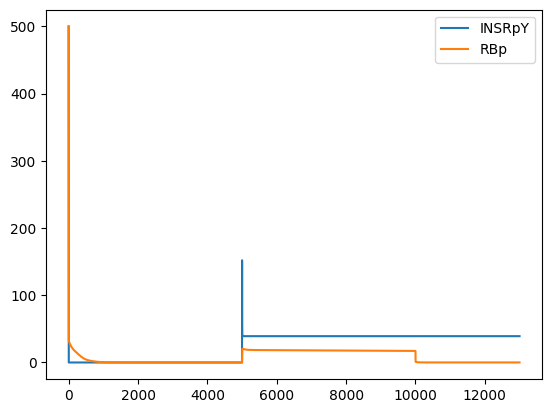

In [110]:
import matplotlib.pyplot as plt

result_to_print = ['INSRpY','RBp']

for species in result_to_print:
    plt.plot(initial_result['time'], initial_result[f'[{species}]'], label=species)

plt.legend()
plt.show()


Default Parameter Set initial testing:
----------------------------------------
Success <class 'roadrunner._roadrunner.NamedArray'> (10000, 60)
Parameter set 0 initial testing:
----------------------------------------
CVODE Error: CV_TOO_MUCH_WORK: The solver took mxstep (20000) internal steps but could not reach tout.; In ?integrate@CVODEIntegrator@rr@@UEAANNN@Z 
 occurred at parameter set 0 

----------------------------------------
Parameter set 1 initial testing:
----------------------------------------
CVODE Error: CV_TOO_MUCH_WORK: The solver took mxstep (20000) internal steps but could not reach tout.; In ?integrate@CVODEIntegrator@rr@@UEAANNN@Z 
 occurred at parameter set 1 

----------------------------------------
Parameter set 2 initial testing:
----------------------------------------
Success <class 'pandas.core.frame.DataFrame'> (5000, 60)
----------------------------------------
Parameter set 3 initial testing:
----------------------------------------
CVODE Error: CV_TOO_

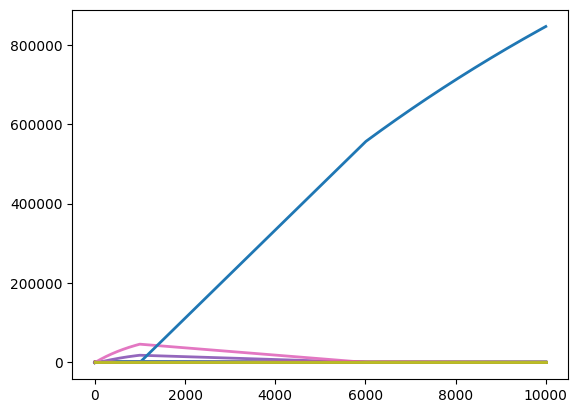

[[<matplotlib.lines.Line2D at 0x1901baa8ac0>],

In [13]:
# load parameter files 

import pandas as pd
import matplotlib.pyplot as plt

rr = roadrunner.RoadRunner("data\export_ECC_Base.xml")

print(f'Default Parameter Set initial testing:')
print('----------------------------------------')
try: 
    rr.model[f'inptime_INSULIN'] = 5000
    rr.model[f'inptime_CDK46i'] = 10000
    initial_result = rr.simulate(0, 13000, 10000)
    rr.reset()
    print('Success', type(initial_result), initial_result.shape)
except RuntimeError as e:
    print(f'{e} \n occurred at default parameter values \n')
    print('----------------------------------------')


# load the parameter file
best_paramsets = pd.read_excel(f'data\MCF7_Top50_PS.xlsx')

for i in range(len(best_paramsets)):
    # get the parameter set with the lowest GAScore
    best_row = best_paramsets.iloc[i]

    print(f'Parameter set {i} initial testing:')
    # for col in best_row.index:
    #     print(f'{col}: {best_row[col]}')
    print('----------------------------------------')
    try: 
        replace_model_values(rr, best_row, verbose=0)
        # rr.integrator.maximum_num_steps = 100000
        rr.setIntegrator('cvode')
        rr.model[f'inptime_INSULIN'] = 1000
        rr.model[f'inptime_CDK46i'] = 3000
        set_model_value(rr, 'input_INSULIN', 500)
        set_model_value(rr, 'input_CDK46i', 500)
        result1 = rr.simulate(0, 5000, 1000)
        result2 = rr.simulate(5000, 10000, 1000)
        result3 = rr.simulate(10000, 13000, 3000)
        
        rr.reset()
        
        combined_result = pd.concat([pd.DataFrame(result1, columns=result1.colnames), 
                                     pd.DataFrame(result2, columns=result2.colnames), 
                                     pd.DataFrame(result3, columns=result3.colnames)])
        print('Success', type(combined_result), combined_result.shape)
        print('----------------------------------------')
        
    except RuntimeError as e:
        print(f'{e} \n occurred at parameter set {i} \n')
        print('----------------------------------------')
        continue



rr.plot(combined_result)
    
# result_to_print = ['INSRpY','RBp']



# for species in result_to_print:
#     plt.plot(combined_result['time'], combined_result[f'[{species}]'], label=species)
# plt.legend()
# plt.show()

In [14]:
combined_result.tail()

,time,[INSR],[INSRpY],[IRS],[IRSi],[S6KpT389],[PI3K],[INSRccIRSccPI3K],[PDK1],[PDK1b],...,[RBp],[RBpp],[E2FccRB],[E2FccRBp],[E2FccRBpp],[CDK46ccCYCDccP21],[CDK46ccCYCDccP27],[CDK2ccCYCEccP21],[CDK2ccCYCEccP27],[CDK2ccCYCEccP27p]
2995,12995.998666,395.174202,1.012752,0.421307,395.765647,28.016753,499.755738,0.244262,499.970977,0.029023,...,1.031464e-08,356.932037,117.153460,25.780407,0.059754,1.416812,15.192544,619.459154,0.019674,0.000167
2996,12996.999000,395.174202,1.012752,0.421307,395.765647,28.016753,499.755738,0.244262,499.970977,0.029023,...,1.031358e-08,356.937290,117.150995,25.777620,0.059754,1.416812,15.191156,619.513128,0.019674,0.000167
2997,12997.999333,395.174202,1.012752,0.421307,395.765647,28.016753,499.755738,0.244262,499.970977,0.029023,...,1.031253e-08,356.942543,117.148530,25.774835,0.059755,1.416812,15.189768,619.567103,0.019674,0.000167
2998,12998.999667,395.174202,1.012752,0.421307,395.765647,28.016753,499.755738,0.244262,499.970977,0.029023,...,1.031148e-08,356.947795,117.146065,25.772050,0.059756,1.416812,15.188380,619.621078,0.019674,0.000167
2999,13000.000000,395.174202,1.012752,0.421307,395.765647,28.016753,499.755738,0.244262,499.970977,0.029023,...,1.031043e-08,356.953046,117.143600,25.769265,0.059757,1.416812,15.186993,619.675053,0.019674,0.000167


10 6


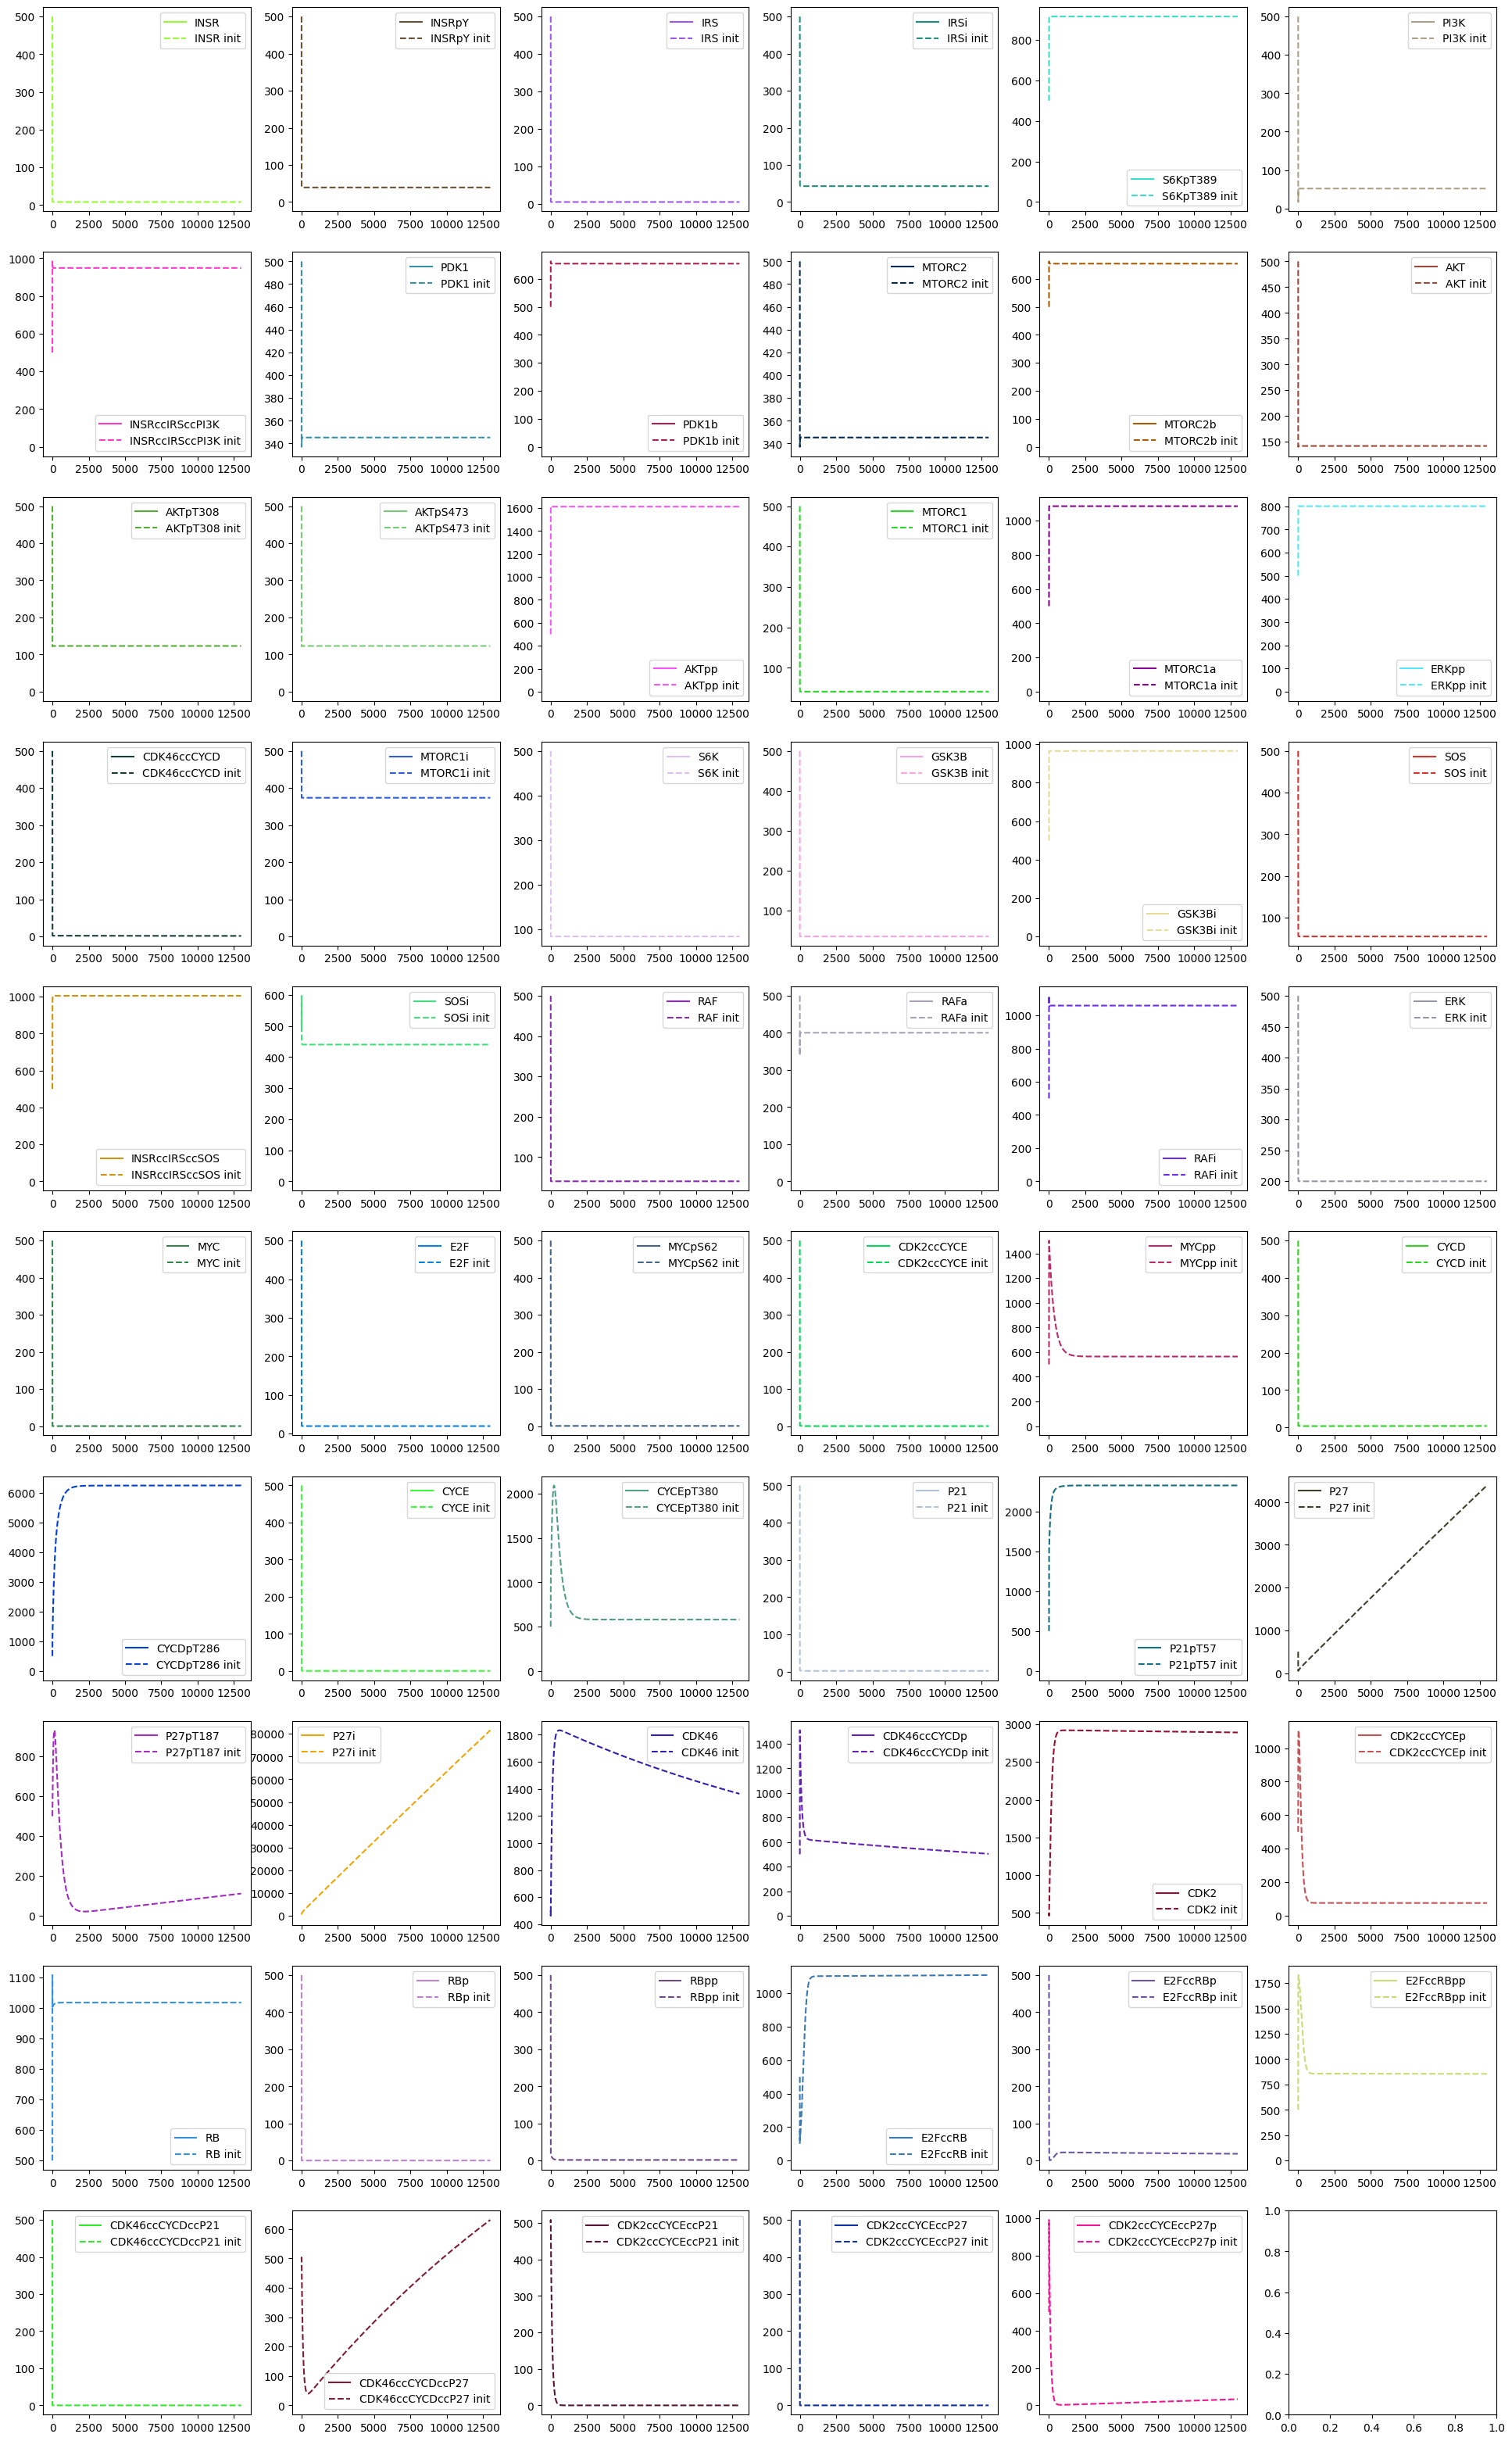

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# plot all the species in the model in separate plots

# determine how many species there are in the model, and how many plots are needed

num_species = len(rr.model.getFloatingSpeciesIds())

# assign a different colour to each species
colours = []
for sp in range(num_species):
    colours.append(np.random.rand(3,))

col_size = 6
num_rows = num_species // col_size + 1
num_cols = num_species % col_size + 1

print(num_rows, num_cols)

# calculate fig size
figsize = (num_cols * 4, num_rows * 4)

fig, axs = plt.subplots(num_rows, num_cols, figsize=figsize)

for i, species in enumerate(rr.model.getFloatingSpeciesIds()):
    # resolve out of bound error
    row = i // col_size
    col = i % col_size
    # print(row, col)
    axs[row, col].plot(result['time'], result[f'[{species}]'], label=species, color=colours[i])
    axs[row, col].plot(initial_result['time'], initial_result[f'[{species}]'], label=f'{species} init', color=colours[i], linestyle='--')
    axs[row, col].legend()
    
# plt.show()

# save the figure

ploader = PathLoader('data_config.env', 'current_user.env')

folder_name = 'data/results/notebook-test'

fig.savefig(f'{ploader.get_data_path()}{folder_name}/anthony-model.png', dpi=300)

fig.savefig('test.png', dpi=300)



In [ ]:
rr.model["init(IRS)"]

# rr.model["init(IRS)"] = 0.5 # for changing initial conditions

In [ ]:
rr.model.getGlobalParameterIds()



In [ ]:
rr.kc_INSULIN_INSR_INSRpY

# rr.kc_INSULIN_INSR_INSRpY = 0.1 # for changing parameter values

In [ ]:
rr.model['kc_INSULIN_INSR_INSRpY'] # another method for changing parameter values

In [ ]:
rr.model['INSR'] # another method for changing initial condition values

In [ ]:
import pandas as pd 

init_result_df = pd.DataFrame(initial_result)
result_df = pd.DataFrame(result)

In [ ]:
init_result_df.to_csv(f'{ploader.get_data_path()}{folder_name}/anthony-model-init.csv')
result_df.to_csv(f'{ploader.get_data_path()}{folder_name}/anthony-model-result.csv')

## Linking CCLE data to Anthony's SBML model initial conditions

In [12]:
# loading anthony's sbml model

from libsbml import *

from PathLoader import PathLoader

ploader = PathLoader('data_config.env', 'current_user.env')

reader = SBMLReader()

document = reader.readSBML(f"data\export_ECC_Base.xml")
folder_name = 'data/results/notebook-test'

from DataLink import DataLink
data_link = DataLink(path_loader, 'data_codes.csv')

ccle = data_link.get_data_from_code('ccle')

In [13]:
match_rules_file = data_link.get_data_from_code('integrate_ccle_anthony')


In [14]:
match_rules_file.head()

,Protein Name,CCLE reference,Method
0,AKT,AKT3;AKT2;AKT1,combination
1,CYCD,CCND1;CCND2;CCND3,manual check
2,CYCE,CCNE1;CCNE2,manual check
3,CDK2,CDK2,direct
4,CDK46,CDK6;CDK4,combination


In [15]:
# iterate through the rows in match_rules_file, and replace the values in the model

match_rules_files_dropna = match_rules_file.dropna(subset=['CCLE reference'])

for i in range(len(match_rules_files_dropna)):
    row = match_rules_files_dropna.iloc[i]  
    specie_name = row['Protein Name']
    ccle_matches = row['CCLE reference']
    ccle_matches = ccle_matches.split(';')
    print(f'{specie_name}: {ccle_matches}')

AKT: ['AKT3', 'AKT2', 'AKT1']
CYCD: ['CCND1', 'CCND2', 'CCND3']
CYCE: ['CCNE1', 'CCNE2']
CDK2: ['CDK2']
CDK46: ['CDK6', 'CDK4']
P21: ['CDKN1A']
P27: ['CDKN1B']
E2F: ['E2F8', 'E2F7', 'E2F6']
GSK3B: ['GSK3B']
INSR: ['INSR']
IRS: ['IRS4', 'IRS2', 'IRS1']
ERK: ['MAPK7', 'MAPK8', 'MAPK9']
MYC: ['MYC']
PI3K: ['PIK3CA', 'PIK3CD', 'PIK3CB', 'PIK3CG']
MTORC2: ['RICTOR']
MTORC1: ['RPTOR ']
S6K: ['RPS6KB1']
PDK1: ['PDK1']
RAF: ['RAF1', 'BRAF', 'ARAF']
RB: ['RB1']
SOS: ['SOS2', 'SOS1']


In [3]:
print(len(ccle.columns))

19222


In [11]:
import difflib

closest_match = difflib.get_close_matches('RPS6KB1', ccle.columns)

print(closest_match)

['RPS6KB1', 'RPS6KL1', 'RPS6KC1']


In [4]:
import difflib

closest_match = difflib.get_close_matches('MAPK', ccle.columns)

print(closest_match)


['MAPK9', 'MAPK8', 'MAPK7']


In [4]:
import difflib

closest_match = difflib.get_close_matches('CDKN1A', ccle.columns)

print(closest_match)


['CDKN1A', 'CDKN2A', 'CDKN1C']


In [5]:
import difflib

closest_match = difflib.get_close_matches('CDKN1B', ccle.columns)

print(closest_match)

['CDKN1B', 'CDKN2B', 'CDKN1C']


In [5]:
import difflib

closest_match = difflib.get_close_matches('CCND', ccle.columns)

print(closest_match)


['CCND3', 'CCND2', 'CCND1']


In [6]:
import difflib

closest_match = difflib.get_close_matches('CCNE', ccle.columns)

print(closest_match)

['CCNE2', 'CCNE1', 'CCNY']


In [11]:
initial_species = rr.model.getFloatingSpeciesIds()

initial_species_df = pd.DataFrame(initial_species)

initial_species_df.to_csv(f'{ploader.get_data_path()}{folder_name}/anthony-model-species.csv')

In [12]:
for species in initial_species:
    if species in ccle.columns: 
        print(f'Direct name match found: {species}')

import difflib
        
for species in initial_species:
    # find closest match in ccle columns
    closest_match = difflib.get_close_matches(species, ccle.columns)
    print(f'Closest match for {species}: {closest_match}')

Direct name match found: INSR
Direct name match found: PDK1
Direct name match found: GSK3B
Direct name match found: MYC
Direct name match found: CDK2
Closest match for INSR: ['INSR', 'INSRR', 'INS']
Closest match for INSRpY: ['INSR', 'INSRR', 'SRY']
Closest match for IRS: ['IRS4', 'IRS2', 'IRS1']
Closest match for IRSi: ['IRS4', 'IRS2', 'IRS1']
Closest match for S6KpT389: ['STK39', 'STK38', 'KRT39']
Closest match for PI3K: ['PI3', 'PIM3', 'PIGK']
Closest match for INSRccIRSccPI3K: []
Closest match for PDK1: ['PDK1', 'PDZK1', 'PDPK1']
Closest match for PDK1b: ['PDK1', 'PDZK1', 'PDPK1']
Closest match for MTORC2: ['MORC2', 'MTARC2', 'ORC2']
Closest match for MTORC2b: ['MORC2', 'MTARC2', 'ORC2']
Closest match for AKT: ['AKT3', 'AKT2', 'AKT1']
Closest match for AKTpT308: ['AKT3', 'TTC38', 'KRT38']
Closest match for AKTpS473: ['AKT3', 'KRT73', 'ANKS3']
Closest match for AKTpp: ['AKT3', 'AKT2', 'AKT1']
Closest match for MTORC1: ['MORC1', 'MTARC1', 'ORC1']
Closest match for MTORC1a: ['MORC1', 

In [13]:
for species in initial_species:
    print(species)

INSR
INSRpY
IRS
IRSi
S6KpT389
PI3K
INSRccIRSccPI3K
PDK1
PDK1b
MTORC2
MTORC2b
AKT
AKTpT308
AKTpS473
AKTpp
MTORC1
MTORC1a
ERKpp
CDK46ccCYCD
MTORC1i
S6K
GSK3B
GSK3Bi
SOS
INSRccIRSccSOS
SOSi
RAF
RAFa
RAFi
ERK
MYC
E2F
MYCpS62
CDK2ccCYCE
MYCpp
CYCD
CYCDpT286
CYCE
CYCEpT380
P21
P21pT57
P27
P27pT187
P27i
CDK46
CDK46ccCYCDp
CDK2
CDK2ccCYCEp
RB
RBp
RBpp
E2FccRB
E2FccRBp
E2FccRBpp
CDK46ccCYCDccP21
CDK46ccCYCDccP27
CDK2ccCYCEccP21
CDK2ccCYCEccP27
CDK2ccCYCEccP27p


## Changing parameters in SBML model to the calibrated set

## Processing dynamic simulation data back to singular vector

## LanODEApp Tests

In [ ]:
'''load in core data and libraries'''

# libraries used 

# load CCLE expression data  

# load Anthony's model and optimal parameter sets 

document = reader.readSBML("data\export_ECC_Base.xml")


## Normalising CCLE data

In [2]:
from DataLink import DataLink 

TheLink = DataLink(path_loader, 'data_codes.csv')

TheLink.load_data_code('ccle')

ccle_df = TheLink.data_code_database['ccle']

In [3]:
ccle_df.head()

,CELLLINE,TSPAN6,TNMD,DPM1,SCYL3,C1orf112,FGR,CFH,FUCA2,GCLC,...,H3C2,H3C3,AC098582.1,DUS4L-BCAP29,C8orf44-SGK3,ELOA3B,NPBWR1,ELOA3D,ELOA3,CDR1
0,ACH-001113,4.331992,0.000000,7.364397,2.792855,4.470537,0.028569,1.226509,3.042644,6.499686,...,2.689299,0.189034,0.201634,2.130931,0.555816,0.0,0.275007,0.0,0.0,0.000000
1,ACH-001289,4.566815,0.584963,7.106537,2.543496,3.504620,0.000000,0.189034,3.813525,4.221104,...,1.286881,1.049631,0.321928,1.464668,0.632268,0.0,0.014355,0.0,0.0,0.000000
2,ACH-001339,3.150560,0.000000,7.379032,2.333424,4.227279,0.056584,1.310340,6.687061,3.682573,...,0.594549,1.097611,0.831877,2.946731,0.475085,0.0,0.084064,0.0,0.0,0.042644
3,ACH-001538,5.085340,0.000000,7.154109,2.545968,3.084064,0.000000,5.868143,6.165309,4.489928,...,0.214125,0.632268,0.298658,1.641546,0.443607,0.0,0.028569,0.0,0.0,0.000000
4,ACH-000242,6.729145,0.000000,6.537607,2.456806,3.867896,0.799087,7.208381,5.569856,7.127014,...,1.117695,2.358959,0.084064,1.910733,0.000000,0.0,0.464668,0.0,0.0,0.000000


In [21]:
random_col_name = 'INSR'

x = ccle_df[random_col_name]

In [22]:
# remove zero values

x_no_zero = x[x != 0]

In [23]:
# calculate median of x

m = x_no_zero.median()

print(f'Column name: {random_col_name}, median: {m}')

Column name: INSR, median: 2.0426443374084937


In [24]:
s = 150 

x_transformed = x / m * s

print(f'Column name: {random_col_name}, median: {x_transformed.median()}')

Column name: INSR, median: 148.83640800009877


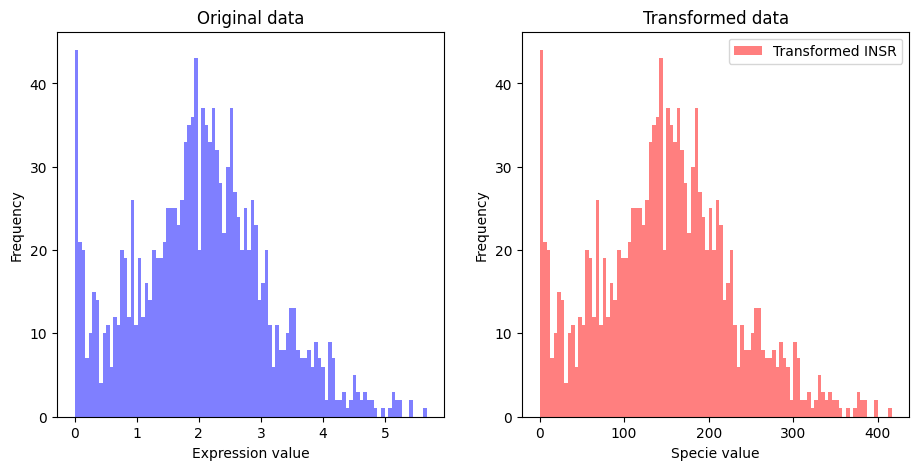

In [26]:
# plot histogram of x transformed and x in comparison 

import matplotlib.pyplot as plt

# plot as two subplots

fig, axs = plt.subplots(1, 2, figsize=(11,5))

axs[0].hist(x, bins=100, label=f'Original {random_col_name}', alpha=0.5, color='blue')
axs[0].set_title('Original data')
axs[0].set_xlabel('Expression value')
axs[0].set_ylabel('Frequency')

axs[1].hist(x_transformed, bins=100, label=f'Transformed {random_col_name}', alpha=0.5, color='red')
axs[1].set_title('Transformed data')
axs[1].set_xlabel('Specie value')
axs[1].set_ylabel('Frequency')

plt.legend()
plt.show()

## Calculating dynamic features using simulated time series

In [27]:
import os 

path = os.getcwd()
# find the string 'project' in the path, return index
index_project = path.find('project')
# slice the path from the index of 'project' to the end
project_path = path[:index_project+7]
# set the working directory
os.chdir(project_path)
print(f'Project path set to: {os.getcwd()}')

from PathLoader import PathLoader

path_loader = PathLoader('data_config.env', 'current_user.env')

from DataLink import DataLink 

TheLink = DataLink(path_loader, 'data_codes.csv')

TheLink.load_data_code('ccle')

ccle_df = TheLink.data_code_database['ccle']

Project path set to: c:\Github\ode-biomarker-project


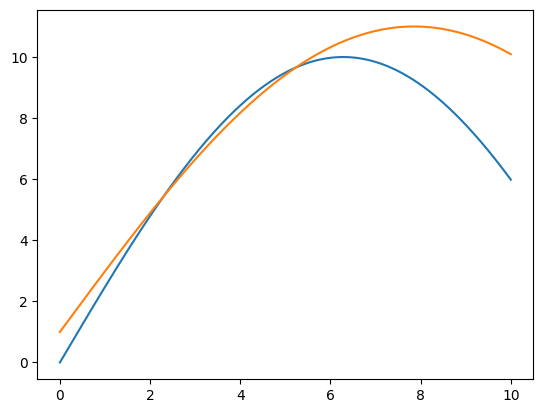

In [43]:
import numpy as np 

# generate a power curve with ups and downs

x = np.linspace(0, 10, 1000)
y = np.sin(x/4) * 10
y2 = np.sin(x/5) * 10 + 1

# plot 

import matplotlib.pyplot as plt

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

In [44]:
auc1 = np.trapz(y, x)

print(auc1)

72.04570702288773


In [45]:
auc2 = np.trapz(y2, x)

print(auc2)

80.80731817763247


In [46]:
max_val = np.max(y)
time_max = x[np.argmax(y)]

print(max_val, time_max)

9.999996994977833 6.286286286286286


In [47]:
max_val2 = np.max(y2)
time_max2 = x[np.argmax(y2)]

print(max_val2, time_max2)

10.999996994977833 7.857857857857858
